# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

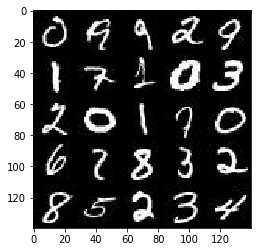

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

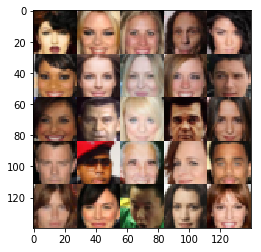

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [43]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    lr = tf.placeholder(tf.float32, (None), name='learning_rate')

    return real_input, z_input, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [55]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope("discriminator", reuse=reuse):
        #Input Layer 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        #14x14x64
        print("Discriminator X1: ", relu1.shape)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * x2, x2)
        #7x7x128
        print("Discriminator X2: ", relu2.shape)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * x3, x3)
        #4x4x256
        print("Discriminator X2: ", relu3.shape)
        
        last_layer = tf.layers.conv2d(relu3, 512, 5, strides=2, padding='same')
        last_layer = tf.layers.batch_normalization(last_layer, training=True)
        relu_last_layer = tf.maximum(alpha * last_layer, last_layer)
        #2x2x512
        print("Discriminator X3: ", last_layer.shape)
        
        print("Discriminator input shape: ", images.shape)
        print("Discriminator shape before flat: ", relu_last_layer.shape)
        
        flat = tf.reshape(relu_last_layer, (-1, 2*2*512))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Discriminator X1:  (?, 14, 14, 64)
Discriminator X2:  (?, 7, 7, 128)
Discriminator X2:  (?, 4, 4, 256)
Discriminator X3:  (?, 2, 2, 512)
Discriminator input shape:  (?, 28, 28, 3)
Discriminator shape before flat:  (?, 2, 2, 512)
Discriminator X1:  (?, 14, 14, 64)
Discriminator X2:  (?, 7, 7, 128)
Discriminator X2:  (?, 4, 4, 256)
Discriminator X3:  (?, 2, 2, 512)
Discriminator input shape:  (?, 28, 28, 3)
Discriminator shape before flat:  (?, 2, 2, 512)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [56]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope("generator", reuse=not is_train):
        x1 = tf.layers.dense(z, 2*2*512, activation=None)
        
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #2x2x512
        print("X1: ", x1.shape)
        
        # Reshape it to start the convolutional stack
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #4x4x256
        print("X2: ", x2.shape)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=1, padding='valid')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #7x7x128
        print("X3: ", x3.shape)
        
         # Reshape it to start the convolutional stack
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        #14x14x64
        print("X4: ", x4.shape)
        
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=2, padding='same')
        #28x28x?
        print("Logits: ", logits.shape)
        
        out = tf.tanh(logits)

    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 5)
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [57]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 4)
Discriminator X1:  (?, 14, 14, 64)
Discriminator X2:  (?, 7, 7, 128)
Discriminator X2:  (?, 4, 4, 256)
Discriminator X3:  (?, 2, 2, 512)
Discriminator input shape:  (?, 28, 28, 4)
Discriminator shape before flat:  (?, 2, 2, 512)
Discriminator X1:  (?, 14, 14, 64)
Discriminator X2:  (?, 7, 7, 128)
Discriminator X2:  (?, 4, 4, 256)
Discriminator X3:  (?, 2, 2, 512)
Discriminator input shape:  (?, 28, 28, 4)
Discriminator shape before flat:  (?, 2, 2, 512)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [58]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate*2, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [60]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [61]:

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 10
    show_generator_every = 100
    steps = 0
    
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                #Normalize Images to [-1, 1] from [-.5, .5]
                batch_images *= 2

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % show_generator_every == 0:
                    show_generator_output(sess, 10, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)
Discriminator X1:  (?, 14, 14, 64)
Discriminator X2:  (?, 7, 7, 128)
Discriminator X2:  (?, 4, 4, 256)
Discriminator X3:  (?, 2, 2, 512)
Discriminator input shape:  (?, 28, 28, 1)
Discriminator shape before flat:  (?, 2, 2, 512)
Discriminator X1:  (?, 14, 14, 64)
Discriminator X2:  (?, 7, 7, 128)
Discriminator X2:  (?, 4, 4, 256)
Discriminator X3:  (?, 2, 2, 512)
Discriminator input shape:  (?, 28, 28, 1)
Discriminator shape before flat:  (?, 2, 2, 512)
Epoch 1/2... Discriminator Loss: 5.7979... Generator Loss: 0.0031
Epoch 1/2... Discriminator Loss: 3.5592... Generator Loss: 0.0366
Epoch 1/2... Discriminator Loss: 1.4372... Generator Loss: 0.5831
Epoch 1/2... Discriminator Loss: 1.3798... Generator Loss: 0.4227
Epoch 1/2... Discriminator Loss: 1.1699... Generator Loss: 0.9324
Epoch 1/2... Discriminator Loss: 1.2119... Generator Loss: 2.6600
Epoch 1/2... Discriminator Loss: 2.0196..

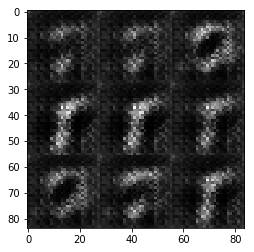

Epoch 1/2... Discriminator Loss: 1.2917... Generator Loss: 0.6607
Epoch 1/2... Discriminator Loss: 1.4784... Generator Loss: 0.6556
Epoch 1/2... Discriminator Loss: 1.6551... Generator Loss: 0.6392
Epoch 1/2... Discriminator Loss: 1.2173... Generator Loss: 0.7890
Epoch 1/2... Discriminator Loss: 1.3661... Generator Loss: 0.5156
Epoch 1/2... Discriminator Loss: 1.3508... Generator Loss: 0.7185
Epoch 1/2... Discriminator Loss: 1.3805... Generator Loss: 0.5769
Epoch 1/2... Discriminator Loss: 1.2460... Generator Loss: 0.7151
Epoch 1/2... Discriminator Loss: 1.3058... Generator Loss: 0.7230
Epoch 1/2... Discriminator Loss: 1.5794... Generator Loss: 0.6318
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


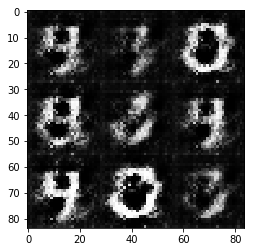

Epoch 1/2... Discriminator Loss: 1.2508... Generator Loss: 0.9605
Epoch 1/2... Discriminator Loss: 1.5561... Generator Loss: 0.8045
Epoch 1/2... Discriminator Loss: 1.2983... Generator Loss: 0.8348
Epoch 1/2... Discriminator Loss: 1.0672... Generator Loss: 1.0077
Epoch 1/2... Discriminator Loss: 1.3925... Generator Loss: 0.8376
Epoch 1/2... Discriminator Loss: 1.1368... Generator Loss: 0.8045
Epoch 1/2... Discriminator Loss: 1.3702... Generator Loss: 0.7744
Epoch 1/2... Discriminator Loss: 1.2322... Generator Loss: 0.7436
Epoch 1/2... Discriminator Loss: 1.4550... Generator Loss: 0.7522
Epoch 1/2... Discriminator Loss: 1.3493... Generator Loss: 0.7105
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


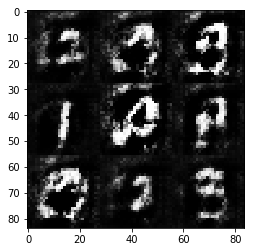

Epoch 1/2... Discriminator Loss: 1.6826... Generator Loss: 0.6866
Epoch 1/2... Discriminator Loss: 1.2867... Generator Loss: 0.6400
Epoch 1/2... Discriminator Loss: 1.2518... Generator Loss: 0.7547
Epoch 1/2... Discriminator Loss: 1.4279... Generator Loss: 1.0561
Epoch 1/2... Discriminator Loss: 1.2952... Generator Loss: 0.5357
Epoch 1/2... Discriminator Loss: 1.5406... Generator Loss: 0.8284
Epoch 1/2... Discriminator Loss: 1.4787... Generator Loss: 0.5438
Epoch 1/2... Discriminator Loss: 1.3615... Generator Loss: 1.1426
Epoch 1/2... Discriminator Loss: 1.3754... Generator Loss: 0.5457
Epoch 1/2... Discriminator Loss: 1.4960... Generator Loss: 0.5939
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


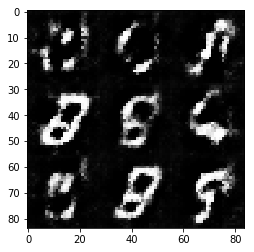

Epoch 1/2... Discriminator Loss: 1.2787... Generator Loss: 0.5311
Epoch 1/2... Discriminator Loss: 1.6716... Generator Loss: 0.3972
Epoch 1/2... Discriminator Loss: 1.1228... Generator Loss: 0.8329
Epoch 1/2... Discriminator Loss: 0.9314... Generator Loss: 1.2771
Epoch 1/2... Discriminator Loss: 1.2938... Generator Loss: 1.0989
Epoch 1/2... Discriminator Loss: 1.2603... Generator Loss: 0.8174
Epoch 1/2... Discriminator Loss: 1.3351... Generator Loss: 0.6699
Epoch 1/2... Discriminator Loss: 1.1790... Generator Loss: 0.8450
Epoch 1/2... Discriminator Loss: 1.3282... Generator Loss: 0.7533
Epoch 1/2... Discriminator Loss: 1.3889... Generator Loss: 0.7271
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


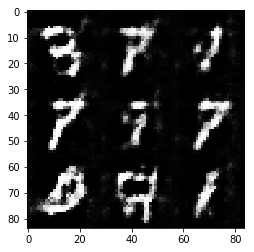

Epoch 1/2... Discriminator Loss: 1.2949... Generator Loss: 0.6957
Epoch 1/2... Discriminator Loss: 1.3100... Generator Loss: 1.0685
Epoch 1/2... Discriminator Loss: 1.2218... Generator Loss: 0.6570
Epoch 1/2... Discriminator Loss: 1.5712... Generator Loss: 1.3983
Epoch 1/2... Discriminator Loss: 1.4995... Generator Loss: 0.8096
Epoch 1/2... Discriminator Loss: 1.3331... Generator Loss: 0.6641
Epoch 1/2... Discriminator Loss: 1.4604... Generator Loss: 0.8243
Epoch 1/2... Discriminator Loss: 1.5094... Generator Loss: 0.5771
Epoch 1/2... Discriminator Loss: 1.3337... Generator Loss: 0.6602
Epoch 1/2... Discriminator Loss: 1.4250... Generator Loss: 0.5259
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


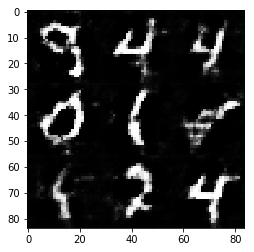

Epoch 1/2... Discriminator Loss: 1.3522... Generator Loss: 0.6382
Epoch 1/2... Discriminator Loss: 1.3374... Generator Loss: 0.4760
Epoch 1/2... Discriminator Loss: 1.4194... Generator Loss: 1.0824
Epoch 1/2... Discriminator Loss: 1.2278... Generator Loss: 0.6936
Epoch 1/2... Discriminator Loss: 1.3495... Generator Loss: 0.7321
Epoch 1/2... Discriminator Loss: 1.2926... Generator Loss: 0.7366
Epoch 1/2... Discriminator Loss: 1.2647... Generator Loss: 0.7626
Epoch 1/2... Discriminator Loss: 1.5541... Generator Loss: 0.4379
Epoch 1/2... Discriminator Loss: 1.3699... Generator Loss: 0.6725
Epoch 1/2... Discriminator Loss: 1.3207... Generator Loss: 0.6214
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


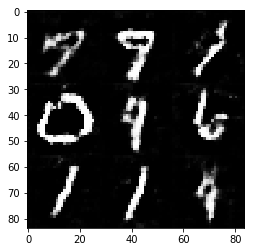

Epoch 1/2... Discriminator Loss: 1.3349... Generator Loss: 0.5968
Epoch 1/2... Discriminator Loss: 1.3847... Generator Loss: 0.6424
Epoch 1/2... Discriminator Loss: 1.4277... Generator Loss: 0.6511
Epoch 1/2... Discriminator Loss: 1.3836... Generator Loss: 0.4928
Epoch 1/2... Discriminator Loss: 1.3669... Generator Loss: 0.4992
Epoch 1/2... Discriminator Loss: 1.4401... Generator Loss: 0.6489
Epoch 1/2... Discriminator Loss: 1.3566... Generator Loss: 0.4863
Epoch 1/2... Discriminator Loss: 1.4531... Generator Loss: 0.5328
Epoch 1/2... Discriminator Loss: 1.5002... Generator Loss: 0.5097
Epoch 1/2... Discriminator Loss: 1.3986... Generator Loss: 0.7186
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


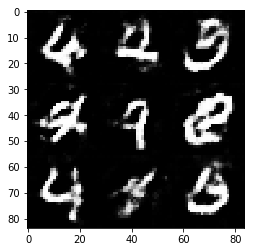

Epoch 1/2... Discriminator Loss: 1.3911... Generator Loss: 0.6562
Epoch 1/2... Discriminator Loss: 1.3135... Generator Loss: 0.8398
Epoch 1/2... Discriminator Loss: 1.3001... Generator Loss: 0.8498
Epoch 1/2... Discriminator Loss: 1.3839... Generator Loss: 0.7858
Epoch 1/2... Discriminator Loss: 1.4729... Generator Loss: 0.3940
Epoch 1/2... Discriminator Loss: 1.3549... Generator Loss: 0.5772
Epoch 1/2... Discriminator Loss: 1.3709... Generator Loss: 0.6191
Epoch 1/2... Discriminator Loss: 1.3820... Generator Loss: 0.4745
Epoch 1/2... Discriminator Loss: 1.4930... Generator Loss: 1.0895
Epoch 1/2... Discriminator Loss: 1.3331... Generator Loss: 0.7034
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


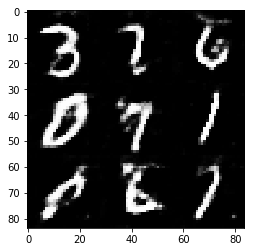

Epoch 1/2... Discriminator Loss: 1.4689... Generator Loss: 0.3638
Epoch 1/2... Discriminator Loss: 1.3601... Generator Loss: 0.7258
Epoch 1/2... Discriminator Loss: 1.4152... Generator Loss: 0.5809
Epoch 2/2... Discriminator Loss: 1.2832... Generator Loss: 0.6544
Epoch 2/2... Discriminator Loss: 1.4048... Generator Loss: 0.5422
Epoch 2/2... Discriminator Loss: 1.4043... Generator Loss: 0.4412
Epoch 2/2... Discriminator Loss: 1.4818... Generator Loss: 0.8676
Epoch 2/2... Discriminator Loss: 1.4755... Generator Loss: 0.8254
Epoch 2/2... Discriminator Loss: 1.4007... Generator Loss: 0.5863
Epoch 2/2... Discriminator Loss: 1.4177... Generator Loss: 0.5510
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


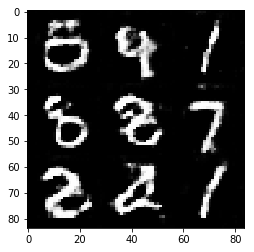

Epoch 2/2... Discriminator Loss: 1.2260... Generator Loss: 0.6820
Epoch 2/2... Discriminator Loss: 1.6730... Generator Loss: 0.9167
Epoch 2/2... Discriminator Loss: 1.4393... Generator Loss: 0.4681
Epoch 2/2... Discriminator Loss: 1.3479... Generator Loss: 0.6762
Epoch 2/2... Discriminator Loss: 1.5089... Generator Loss: 0.4519
Epoch 2/2... Discriminator Loss: 1.3149... Generator Loss: 0.5420
Epoch 2/2... Discriminator Loss: 1.3889... Generator Loss: 0.3946
Epoch 2/2... Discriminator Loss: 2.0114... Generator Loss: 0.1863
Epoch 2/2... Discriminator Loss: 1.4604... Generator Loss: 0.4372
Epoch 2/2... Discriminator Loss: 1.6462... Generator Loss: 0.3324
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


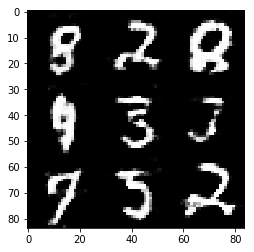

Epoch 2/2... Discriminator Loss: 1.3259... Generator Loss: 0.4854
Epoch 2/2... Discriminator Loss: 1.2405... Generator Loss: 1.0278
Epoch 2/2... Discriminator Loss: 1.3498... Generator Loss: 0.7313
Epoch 2/2... Discriminator Loss: 1.4254... Generator Loss: 0.4436
Epoch 2/2... Discriminator Loss: 1.3324... Generator Loss: 0.4604
Epoch 2/2... Discriminator Loss: 1.2689... Generator Loss: 1.1976
Epoch 2/2... Discriminator Loss: 1.2407... Generator Loss: 0.8576
Epoch 2/2... Discriminator Loss: 1.5844... Generator Loss: 0.3835
Epoch 2/2... Discriminator Loss: 1.2628... Generator Loss: 0.5166
Epoch 2/2... Discriminator Loss: 1.6782... Generator Loss: 0.2761
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


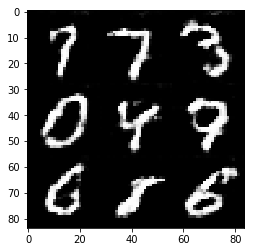

Epoch 2/2... Discriminator Loss: 1.4325... Generator Loss: 0.5245
Epoch 2/2... Discriminator Loss: 1.1346... Generator Loss: 0.7064
Epoch 2/2... Discriminator Loss: 1.4285... Generator Loss: 0.4812
Epoch 2/2... Discriminator Loss: 1.8140... Generator Loss: 0.2285
Epoch 2/2... Discriminator Loss: 1.4378... Generator Loss: 0.3663
Epoch 2/2... Discriminator Loss: 2.0040... Generator Loss: 0.1986
Epoch 2/2... Discriminator Loss: 1.2480... Generator Loss: 0.6811
Epoch 2/2... Discriminator Loss: 1.2344... Generator Loss: 0.5183
Epoch 2/2... Discriminator Loss: 1.6616... Generator Loss: 2.0975
Epoch 2/2... Discriminator Loss: 1.1398... Generator Loss: 0.7181
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


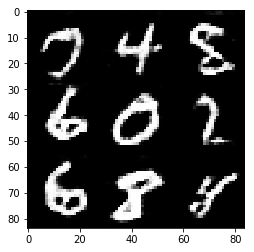

Epoch 2/2... Discriminator Loss: 1.1062... Generator Loss: 0.8731
Epoch 2/2... Discriminator Loss: 1.3208... Generator Loss: 0.5210
Epoch 2/2... Discriminator Loss: 1.4256... Generator Loss: 0.6012
Epoch 2/2... Discriminator Loss: 1.1913... Generator Loss: 1.0364
Epoch 2/2... Discriminator Loss: 1.1940... Generator Loss: 0.5502
Epoch 2/2... Discriminator Loss: 1.2078... Generator Loss: 1.0011
Epoch 2/2... Discriminator Loss: 1.4231... Generator Loss: 0.3780
Epoch 2/2... Discriminator Loss: 2.3340... Generator Loss: 0.1194
Epoch 2/2... Discriminator Loss: 1.3416... Generator Loss: 0.4745
Epoch 2/2... Discriminator Loss: 1.4571... Generator Loss: 1.1548
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


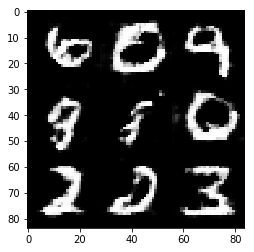

Epoch 2/2... Discriminator Loss: 1.7058... Generator Loss: 0.2742
Epoch 2/2... Discriminator Loss: 1.0886... Generator Loss: 0.9149
Epoch 2/2... Discriminator Loss: 1.8332... Generator Loss: 0.2096
Epoch 2/2... Discriminator Loss: 1.5898... Generator Loss: 0.3790
Epoch 2/2... Discriminator Loss: 1.7076... Generator Loss: 0.2454
Epoch 2/2... Discriminator Loss: 1.8645... Generator Loss: 0.2090
Epoch 2/2... Discriminator Loss: 2.2158... Generator Loss: 0.1429
Epoch 2/2... Discriminator Loss: 1.3218... Generator Loss: 0.4853
Epoch 2/2... Discriminator Loss: 1.8881... Generator Loss: 0.2146
Epoch 2/2... Discriminator Loss: 1.7346... Generator Loss: 0.3019
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


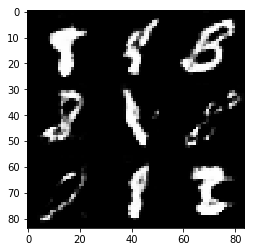

Epoch 2/2... Discriminator Loss: 1.9004... Generator Loss: 0.2112
Epoch 2/2... Discriminator Loss: 1.5122... Generator Loss: 0.3438
Epoch 2/2... Discriminator Loss: 1.4130... Generator Loss: 0.3668
Epoch 2/2... Discriminator Loss: 1.0346... Generator Loss: 1.0707
Epoch 2/2... Discriminator Loss: 1.6417... Generator Loss: 0.2677
Epoch 2/2... Discriminator Loss: 1.1344... Generator Loss: 0.7580
Epoch 2/2... Discriminator Loss: 1.0237... Generator Loss: 1.1057
Epoch 2/2... Discriminator Loss: 1.1039... Generator Loss: 1.8988
Epoch 2/2... Discriminator Loss: 1.2160... Generator Loss: 0.6574
Epoch 2/2... Discriminator Loss: 1.3413... Generator Loss: 0.4436
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


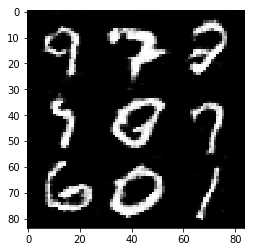

Epoch 2/2... Discriminator Loss: 1.9957... Generator Loss: 0.1865
Epoch 2/2... Discriminator Loss: 1.3098... Generator Loss: 0.6293
Epoch 2/2... Discriminator Loss: 1.3789... Generator Loss: 0.3961
Epoch 2/2... Discriminator Loss: 1.1217... Generator Loss: 0.6290
Epoch 2/2... Discriminator Loss: 2.2731... Generator Loss: 0.1363
Epoch 2/2... Discriminator Loss: 1.0359... Generator Loss: 0.8765
Epoch 2/2... Discriminator Loss: 1.3289... Generator Loss: 0.4016
Epoch 2/2... Discriminator Loss: 1.9685... Generator Loss: 0.1854
Epoch 2/2... Discriminator Loss: 1.2881... Generator Loss: 0.5451
Epoch 2/2... Discriminator Loss: 1.2163... Generator Loss: 0.9055
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


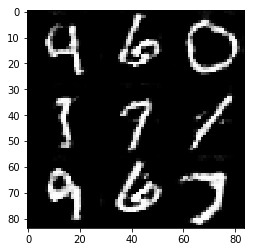

Epoch 2/2... Discriminator Loss: 0.9202... Generator Loss: 1.0793
Epoch 2/2... Discriminator Loss: 0.8993... Generator Loss: 0.9723
Epoch 2/2... Discriminator Loss: 1.8334... Generator Loss: 0.2306
Epoch 2/2... Discriminator Loss: 2.0422... Generator Loss: 0.1662
Epoch 2/2... Discriminator Loss: 1.7432... Generator Loss: 0.2447
Epoch 2/2... Discriminator Loss: 1.1016... Generator Loss: 0.6885
Epoch 2/2... Discriminator Loss: 1.8472... Generator Loss: 0.2140
Epoch 2/2... Discriminator Loss: 0.9679... Generator Loss: 1.3860
Epoch 2/2... Discriminator Loss: 1.5705... Generator Loss: 0.3145
Epoch 2/2... Discriminator Loss: 0.9161... Generator Loss: 0.8095
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 1)


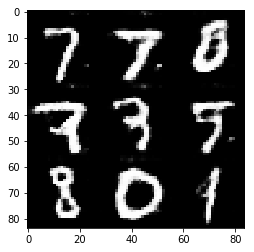

Epoch 2/2... Discriminator Loss: 1.2587... Generator Loss: 1.4949
Epoch 2/2... Discriminator Loss: 2.1271... Generator Loss: 0.1612
Epoch 2/2... Discriminator Loss: 2.0950... Generator Loss: 0.1659
Epoch 2/2... Discriminator Loss: 1.1976... Generator Loss: 0.5252
Epoch 2/2... Discriminator Loss: 1.4012... Generator Loss: 0.3648
Epoch 2/2... Discriminator Loss: 2.3430... Generator Loss: 0.1300
Epoch 2/2... Discriminator Loss: 1.7036... Generator Loss: 0.2593


In [63]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.4
tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)
Discriminator X1:  (?, 14, 14, 64)
Discriminator X2:  (?, 7, 7, 128)
Discriminator X2:  (?, 4, 4, 256)
Discriminator X3:  (?, 2, 2, 512)
Discriminator input shape:  (?, 28, 28, 3)
Discriminator shape before flat:  (?, 2, 2, 512)
Discriminator X1:  (?, 14, 14, 64)
Discriminator X2:  (?, 7, 7, 128)
Discriminator X2:  (?, 4, 4, 256)
Discriminator X3:  (?, 2, 2, 512)
Discriminator input shape:  (?, 28, 28, 3)
Discriminator shape before flat:  (?, 2, 2, 512)
Epoch 1/1... Discriminator Loss: 4.4171... Generator Loss: 0.0137
Epoch 1/1... Discriminator Loss: 2.1493... Generator Loss: 0.1621
Epoch 1/1... Discriminator Loss: 2.9516... Generator Loss: 0.3659
Epoch 1/1... Discriminator Loss: 1.7757... Generator Loss: 1.1561
Epoch 1/1... Discriminator Loss: 1.4671... Generator Loss: 0.7344
Epoch 1/1... Discriminator Loss: 1.7017... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.7799..

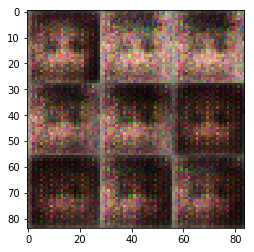

Epoch 1/1... Discriminator Loss: 1.5054... Generator Loss: 0.6280
Epoch 1/1... Discriminator Loss: 1.4499... Generator Loss: 0.6470
Epoch 1/1... Discriminator Loss: 1.5587... Generator Loss: 0.5494
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.5055... Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 1.8617... Generator Loss: 0.4398
Epoch 1/1... Discriminator Loss: 1.5218... Generator Loss: 0.6141
Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 0.5946
Epoch 1/1... Discriminator Loss: 1.5158... Generator Loss: 0.5779
Epoch 1/1... Discriminator Loss: 1.5002... Generator Loss: 0.6371
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


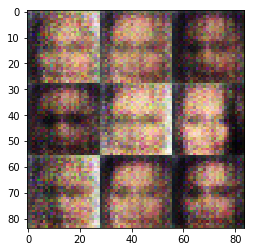

Epoch 1/1... Discriminator Loss: 1.6176... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 1.6392... Generator Loss: 0.5680
Epoch 1/1... Discriminator Loss: 1.4740... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.4680... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.4951... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.4724... Generator Loss: 0.6633
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 1.4591... Generator Loss: 0.6375
Epoch 1/1... Discriminator Loss: 1.4867... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.4809... Generator Loss: 0.6464
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


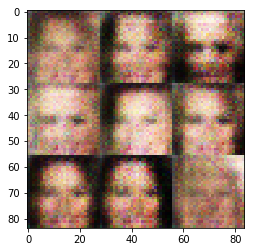

Epoch 1/1... Discriminator Loss: 1.4389... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.4618... Generator Loss: 0.6520
Epoch 1/1... Discriminator Loss: 1.4627... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.6596
Epoch 1/1... Discriminator Loss: 1.3838... Generator Loss: 0.6713
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.4119... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.6819
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


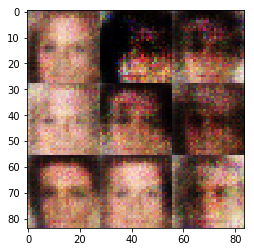

Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.4445... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.4069... Generator Loss: 0.6570
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.4411... Generator Loss: 0.6603
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.6699
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.6694
Epoch 1/1... Discriminator Loss: 1.4081... Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.6694
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


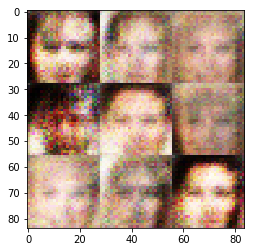

Epoch 1/1... Discriminator Loss: 1.4222... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.6639
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.3625... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.6465
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


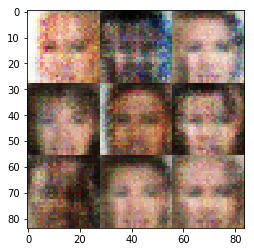

Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.7003
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.4232... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.6666
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.6798
Epoch 1/1... Discriminator Loss: 1.4116... Generator Loss: 0.6652
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


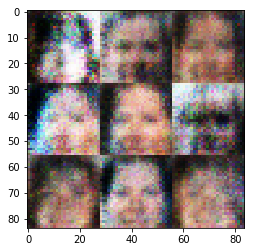

Epoch 1/1... Discriminator Loss: 1.4081... Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.4118... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 1.4367... Generator Loss: 0.6618
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.6688
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


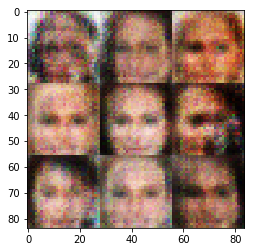

Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.4143... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.4051... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.4048... Generator Loss: 0.6670
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.6954
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.6692
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


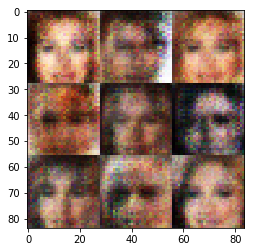

Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.6732
Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.4075... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.6795
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.7144
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


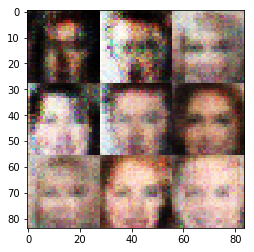

Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.6883
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 1.4143... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.6797
Epoch 1/1... Discriminator Loss: 1.3939... Generator Loss: 0.6910
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


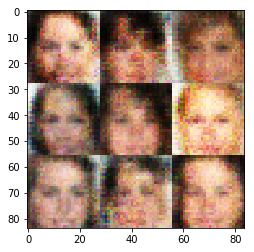

Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.6791
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.6773
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


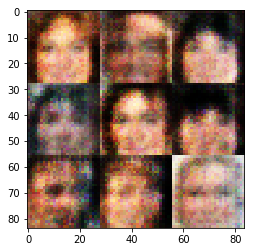

Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.6898
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.6708
Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.4053... Generator Loss: 0.6705
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.3980... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.6725
Epoch 1/1... Discriminator Loss: 1.4043... Generator Loss: 0.6681
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.6728
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


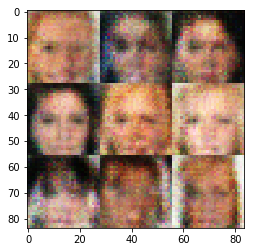

Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.6863
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.6861
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.6990
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


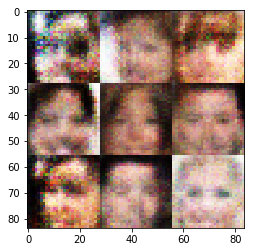

Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.6774
Epoch 1/1... Discriminator Loss: 1.3980... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.6544
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


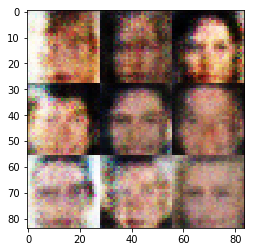

Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.7017
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 1.4048... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 1.4043... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6677
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


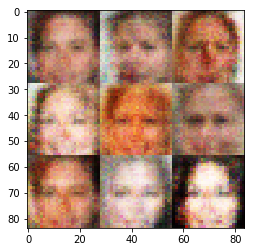

Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.6772
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.6867
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.6939
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.6714
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


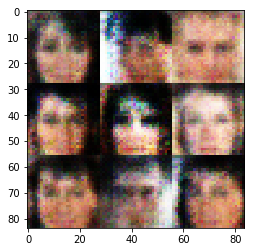

Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.6894
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.6685
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.7229
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.6764
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


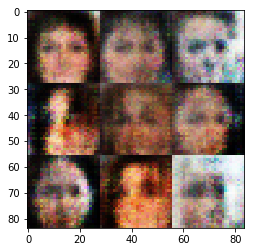

Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.6692
Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.6981
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.6859
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.3982... Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6797
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.7196
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.6928
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


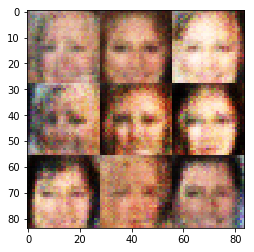

Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.7005
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.4022... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6768
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.4043... Generator Loss: 0.6933
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.7024
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.6882
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


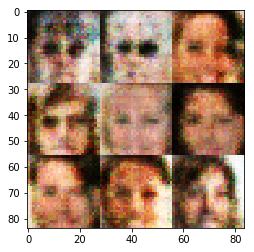

Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.3936... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.6726
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.3884... Generator Loss: 0.6801
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.7021
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.6922
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


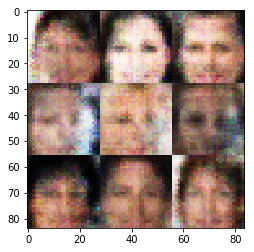

Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6860
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.6937
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.3919... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.7002
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.6928
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


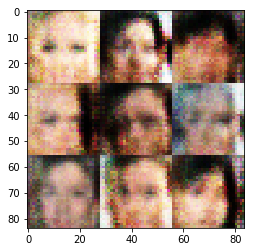

Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.6956
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 1.3919... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.6950
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.6807
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


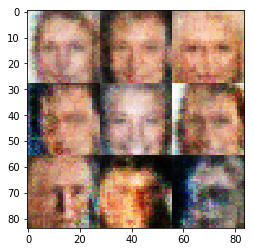

Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.6895
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.6947
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


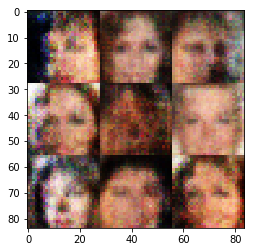

Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.6955
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 0.6695
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.7079
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


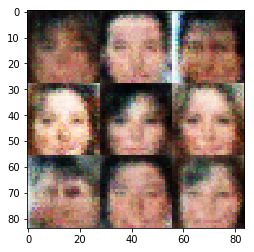

Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.7296
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.6886
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.3939... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.6994
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.6936
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


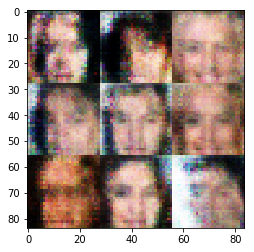

Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.6797
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.3939... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.7023
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.6774
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


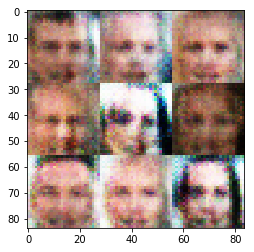

Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.7090
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.6709
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.7219
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.6887
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


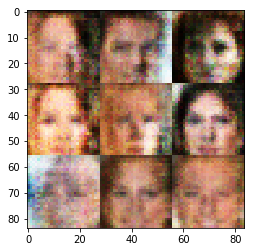

Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.7028
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7187
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.6774
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.6863
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


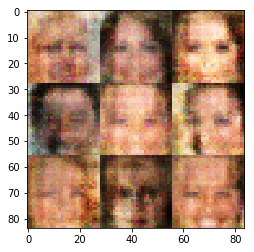

Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.7111
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.7131
Epoch 1/1... Discriminator Loss: 1.3870... Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.6859
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.6815
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.6861
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


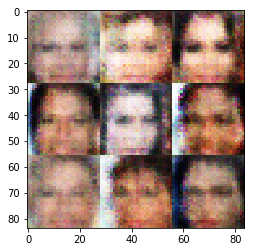

Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.7042
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.7144
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.7224
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.6649
X1:  (?, 2, 2, 512)
X2:  (?, 4, 4, 256)
X3:  (?, 7, 7, 128)
X4:  (?, 14, 14, 64)
Logits:  (?, 28, 28, 3)


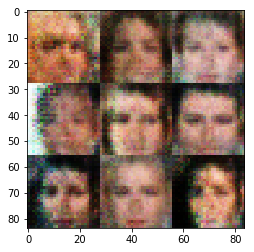

Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.7383
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.6532
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.6888
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.6656


In [64]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.4
tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.